In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# from scipy.stats import 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_data_df = pd.merge(study_results, mouse_metadata, on='Mouse ID', )
combined_data_df.head()


# Display the data table for preview


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Checking the number of mice.

combined_data_df["Mouse ID"].nunique()



249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
                            
duplicate_mouse_ID = combined_data_df[combined_data_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mouse_ID


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

combined_data_df[combined_data_df["Mouse ID"]=="g989"]



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = combined_data_df[combined_data_df["Mouse ID"]!="g989"]


In [7]:
# Checking the number of mice in the clean DataFrame.

clean_df["Mouse ID"].nunique()


248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tumor_volume_gp = clean_df.groupby("Drug Regimen")['Tumor Volume (mm3)']

pd.DataFrame({
    'mean': tumor_volume_gp.mean(),
    'median': tumor_volume_gp.median(),
    'variance': tumor_volume_gp.var(),
    'standard deviation': tumor_volume_gp.std(),
    'SEM': tumor_volume_gp.sem()
})

,mean,median,variance,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
tumor_volume_gp.agg(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Amount')

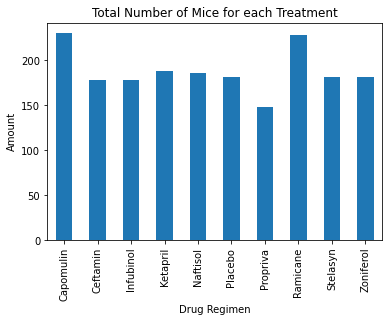

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

data_plot = clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
data_plot.plot.bar()

plt.title("Total Number of Mice for each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Amount")


<function matplotlib.pyplot.legend(*args, **kwargs)>

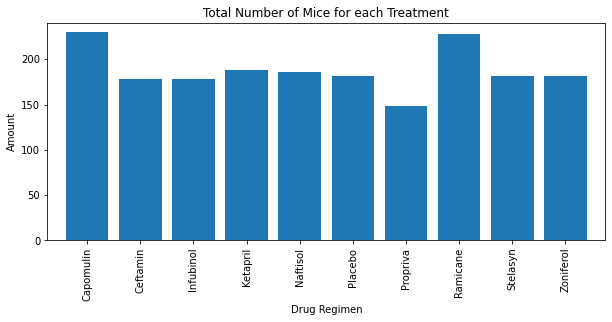

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

x_axis = np.arange(len(data_plot))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(10,4))
plt.bar(x_axis, data_plot, alpha=1, align='center')
plt.xticks(tick_locations, data_plot.index.values, rotation="vertical")

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(data_plot)+10)

plt.title("Total Number of Mice for each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Amount")
plt.legend

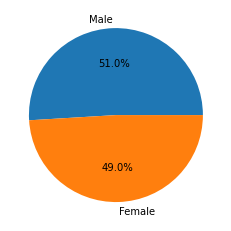

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mf =  clean_df.Sex.value_counts()
mf_pie = mf.plot.pie(y="Total Count", autopct='%1.1f%%')
plt.ylabel('')
plt.show()

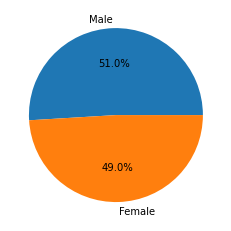

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(mf, labels=mf.index.values, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
endpoint = clean_df.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge the two DataFrames on Mouse ID AND Timepoint to get a dataframe with last timepoint
endtime_mrg_df = pd.merge(clean_df, endpoint, on = ["Mouse ID", "Timepoint"])

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
endtime_mrg_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,35,71.905117,0,Ketapril,Female,2,29
3,a457,10,49.783419,0,Ketapril,Female,11,30
4,c819,40,62.175705,1,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
243,t565,45,34.455298,0,Capomulin,Female,20,17
244,i557,45,47.685963,1,Capomulin,Female,1,24
245,m957,45,33.329098,1,Capomulin,Female,3,19
246,f966,20,30.485985,0,Capomulin,Male,16,17


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumvol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    tumor_data = endtime_mrg_df[endtime_mrg_df['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    iqr = tumor_data.quantile(.75) - tumor_data.quantile(.25)
    high = tumor_data.quantile(.75) + 1.5*iqr
    low =  tumor_data.quantile(.25) - 1.5*iqr
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    tumvol.append(tumor_data)
    
    # Determine outliers using upper and lower bounds
    print(f'{drug} potential outliers: {tumor_data[(tumor_data<low) | (tumor_data>high)]}')

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 29    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


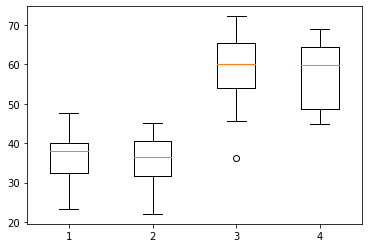

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumvol)
plt.show()

## Line and Scatter Plots

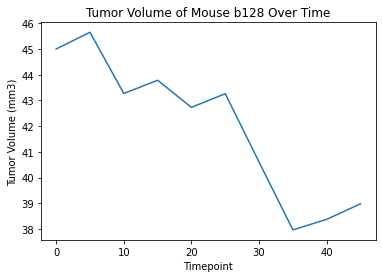

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

line_plot = clean_df.loc[(clean_df["Mouse ID"] == "b128")]
line_plot = line_plot.set_index("Timepoint")
line_plot

#Final plot
line_plot["Tumor Volume (mm3)"].plot()
plt.title("Tumor Volume of Mouse b128 Over Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

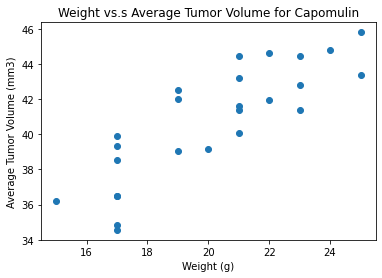

In [31]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


scatter_plot = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin")]
scatter_plot

scatter_plot_df = scatter_plot.groupby(["Mouse ID"]).mean()
scatter_plot_df

weight_scatter_plot = scatter_plot_df["Weight (g)"]
vol_scatter_plot = scatter_plot_df["Tumor Volume (mm3)"]

plt.title("Weight vs.s Average Tumor Volume for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.scatter(weight_scatter_plot, vol_scatter_plot)
plt.show()



## Correlation and Regression

In [32]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weight_scatter_plot, vol_scatter_plot)
print(f"The correlation between weight and tumor volume for Capomulin is {round(correlation[0],2)}")


The correlation between weight and tumor volume for Capomulin is 0.84


The r-squared is: 0.7088568047708717


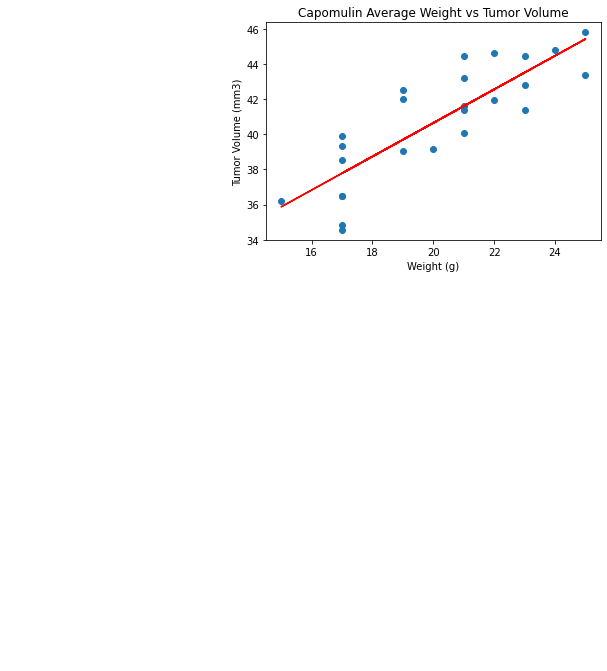

In [44]:
# linear regression model

x_values = scatter_plot_df["Weight (g)"]
y_values = scatter_plot_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Average Weight vs Tumor Volume")
print(f"The r-squared is: {rvalue**2}")
plt.show()
